# 1차시: Neural Network 기초
#### Import

In [1]:
!pip install --upgrade git+https://github.com/dAiv-CNU/torchdaiv.git

  Cloning https://github.com/dAiv-CNU/torchdaiv.git to /tmp/pip-req-build-fy0xhdu0
  Running command git clone --filter=blob:none --quiet https://github.com/dAiv-CNU/torchdaiv.git /tmp/pip-req-build-fy0xhdu0
  Resolved https://github.com/dAiv-CNU/torchdaiv.git to commit 20d31332218bbd1c73bf447ce50b2dabebaf9a28
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached torchvision-0.18.0-cp310-cp310-manylinux1_x86_64.whl (7.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py

In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchdaiv import datasets
from torchdaiv.lectures.emotion import nn
from torchdaiv.lectures.emotion.util import vocabulary, transforms

from rich.traceback import install
install(show_locals=True)

<bound method InteractiveShell.excepthook of <google.colab._shell.Shell object at 0x7c019432b7c0>>

#### Load Dataset

In [3]:
# 사전 생성기 초기화, 데이터셋 로드
vocab, to_vocab = vocabulary.vocabulary_creator()
train_dataset = datasets.EmotionDataset("./data", download=True, train=True, sentiment=True, transform=to_vocab)
test_dataset = datasets.EmotionDataset("./data", download=True, train=False, sentiment=True, transform=to_vocab)

100%|██████████| 65440768/65440768 [00:00<00:00, 170018350.40it/s]


Extracting ./data/download.tar to ./data
Extracting files recursively...


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Extraction completed.
Using downloaded and verified file: ./data/download.tar
Extracting ./data/download.tar to ./data
Extracting files recursively...


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Extraction completed.


In [4]:
# 데이터셋 형태 확인
for i, (text, emotion) in zip(range(20), train_dataset):
    print(f"{i}: {text} -> {emotion}")

0: 제품은 품질이 맘에드는데 -> 긍정
1: 와펜로고 박음질이 잘안되어있는옷이 2벌입니다.ㅜㅜ -> 부정
2: 떼어내면 자국이남을것같고...  -> 부정
3: 따뜻하게 잘 입고 있는데 -> 긍정
4: 살짝 마감처리가 아쉽기는하네요. -> 부정
5: 품질도 좋고 -> 긍정
6: 가격도 좋아요! -> 긍정
7: 소재가 기모로 되어 있더라구요 -> 긍정
8: 두께감도 적당하게 두툼하고 -> 긍정
9: 부드럽고 -> 긍정
10:  따뜻합니다. -> 긍정
11: 색감도 촌스럽지 않고 너무 예뻐요..! -> 긍정
12: 디자인 멋있습니다. -> 긍정
13: 많이 추울때 입고다녀도 따듯하고 -> 긍정
14: 스타일삽니다. -> 긍정
15: 가성비 좋음.. -> 긍정
16: 두어번기계세탁에 보풀은 아직까진 안일어나네요. -> 중도
17: 안쪽기모도 부드러우편이고 -> 긍정
18: 부쩍추워진 요사이 막입고 다니기 좋다고하네요. -> 긍정
19: 더러움도 덜타는 색감들이고, -> 중도


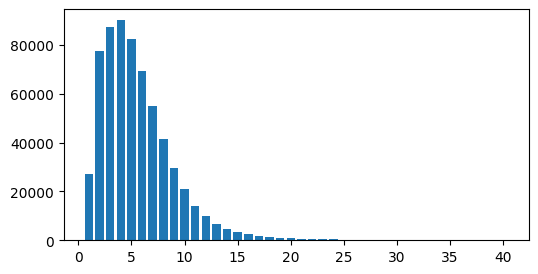

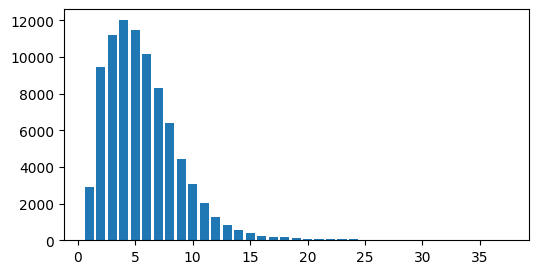

In [5]:
# vocab 생성 후 데이터셋을 텐서로 변환
train_dataset.transform(
    transform=transforms.to_tensor(vocabulary=vocab, show_graph=True),
    target_transform=transforms.label_to_tensor
)
test_dataset.transform(
    transform=transforms.to_tensor(vocabulary=vocab, show_graph=True),
    target_transform=transforms.label_to_tensor
)

In [6]:
# 텐서 크기 조정
max_token_size = 20
train_dataset.transform(transform=transforms.size_to(max_token_size))
test_dataset.transform(transform=transforms.size_to(max_token_size))

In [7]:
# 변환된 데이터 형태 확인
for i, (text, emotion) in zip(range(20), train_dataset):
    print(f"{i}: {text} -> {emotion}")

0: tensor([0.1707, 0.9598, 0.7545, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000]) -> tensor([1., 0., 0.])
1: tensor([0.0000, 0.6938, 0.0000, 0.0000, 0.4155, 0.1842, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000]) -> tensor([0., 0., 1.])
2: tensor([0.0000, 0.0000, 0.4155, 0.4155, 0.4155, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000]) -> tensor([0., 0., 1.])
3: tensor([0.5889, 0.9649, 0.5292, 0.2475, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000]) -> tensor([1., 0., 0.])
4: tensor([0.3120, 0.7468, 0.0000, 0.4155, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.000

#### DataLoader

In [8]:
batch_size = len(train_dataset) // 50

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset)//20, shuffle=True)

#### Model Definition

In [9]:
# 모델 정의
class MyModel(nn.Module):
    def __init__(self, input_max_token: int, hidden_size: int):
        super(MyModel, self).__init__()
        self.input = nn.Linear(input_max_token, hidden_size)
        self.fc1 = nn.Linear(hidden_size, hidden_size // 10)
        self.fc2 = nn.Linear(hidden_size // 10, hidden_size // 20)
        self.fc3 = nn.Linear(hidden_size // 20, 3)

    def forward(self, x):
        h1 = F.relu(self.input(x))
        h2 = F.relu(self.fc1(h1))
        h3 = F.relu(self.fc2(h2))
        out = self.fc3(h3)
        return out

In [10]:
# 하이퍼 파라미터 설정
epochs = 20
learning_rate = 0.01
hidden_layer_size = 4096

In [11]:
# 모델 생성 및 데이터 로더 지정
model = MyModel(input_max_token=max_token_size, hidden_size=hidden_layer_size)
model.set_dataloader(train_dataloader, test_dataloader)
model

MyModel(
  (input): Linear(in_features=20, out_features=4096, bias=True)
  (fc1): Linear(in_features=4096, out_features=409, bias=True)
  (fc2): Linear(in_features=409, out_features=204, bias=True)
  (fc3): Linear(in_features=204, out_features=3, bias=True)
)

In [12]:
# Use CUDA driver if available
if torch.cuda.is_available():
    model.to("cuda", non_blocking=True)
print("Use Device:", model.device.upper())

Use Device: CUDA


#### Training

In [13]:
# Train Dataset에 대해서 학습 시작
model.train(epochs=epochs, optimizer_init=True, lr=learning_rate)

Epoch 1:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [1/20], Step: [51/51], Accuracy: 67.968462%, Loss: 16.29351028


Epoch 2:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [2/20], Step: [51/51], Accuracy: 71.657289%, Loss: 0.71964992


Epoch 3:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [3/20], Step: [51/51], Accuracy: 71.657912%, Loss: 0.72229038


Epoch 4:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [4/20], Step: [51/51], Accuracy: 71.265755%, Loss: 0.72468628


Epoch 5:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [5/20], Step: [51/51], Accuracy: 70.873754%, Loss: 0.72524527


Epoch 6:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [6/20], Step: [51/51], Accuracy: 71.265755%, Loss: 0.72667331


Epoch 7:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [7/20], Step: [51/51], Accuracy: 71.657756%, Loss: 0.71954167


Epoch 8:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [8/20], Step: [51/51], Accuracy: 71.265755%, Loss: 0.72715062


Epoch 9:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [9/20], Step: [51/51], Accuracy: 71.657756%, Loss: 0.71964171


Epoch 10:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [10/20], Step: [51/51], Accuracy: 71.657756%, Loss: 0.71830910


Epoch 11:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [11/20], Step: [51/51], Accuracy: 71.657756%, Loss: 0.71762419


Epoch 12:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [12/20], Step: [51/51], Accuracy: 71.657756%, Loss: 0.71660211


Epoch 13:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [13/20], Step: [51/51], Accuracy: 70.873754%, Loss: 0.72594407


Epoch 14:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [14/20], Step: [51/51], Accuracy: 71.657756%, Loss: 0.72287711


Epoch 15:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [15/20], Step: [51/51], Accuracy: 71.265755%, Loss: 0.72160962


Epoch 16:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [16/20], Step: [51/51], Accuracy: 71.265755%, Loss: 0.72964722


Epoch 17:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [17/20], Step: [51/51], Accuracy: 71.265755%, Loss: 0.73445167


Epoch 18:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [18/20], Step: [51/51], Accuracy: 71.657756%, Loss: 0.72213129


Epoch 19:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [19/20], Step: [51/51], Accuracy: 71.657757%, Loss: 0.71712498


Epoch 20:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [20/20], Step: [51/51], Accuracy: 71.657756%, Loss: 0.71741369


#### Evaluation

In [14]:
# Test Dataset에 대해서 평가 진행
model.evaluate()

Performance Test:   0%|          | 0/21 [00:00<?, ?it/s]

Accuracy: 70.110959%, Loss: 0.73290825


#### Prediction

In [15]:
# 토큰화 및 텐서 변환 후 직접 입력한 문장 분류
transform_sequence = [
    transforms.to_tensor(vocabulary=vocab, show_graph=False),
    transforms.size_to(max_token_size)
]

In [16]:
model.pipeline(message="안녕하세요! 반갑습니다!", transform=transform_sequence)

긍정

In [17]:
model.pipeline(message="이건 좀 아닌거 같음", transform=transform_sequence)

긍정

In [18]:
model.pipeline(message="못 생겼음", transform=transform_sequence)

긍정

In [19]:
model.pipeline(message="잘 받았습니다.", transform=transform_sequence)

긍정

In [20]:
model.pipeline(message="잘 모르겠네요...", transform=transform_sequence)

긍정

In [21]:
model.pipeline(message="색상별로 사이즈가 너무 다르네요 반품귀찮아서 그냥 대충 입으려구요", transform=transform_sequence)

긍정

In [23]:
model.pipeline(message="여름에입긴 더울거같네요 봄.가을용입니다", transform=transform_sequence)

긍정

In [24]:
model.pipeline(message="기대를 안했는데  바지가 생각보다  착용감 편하고 가볍네요", transform=transform_sequence)

긍정

In [25]:
model.pipeline(message="근데 한가지 허리밴드부분이 너무  널어서 좀~  쪼금안 덜  넓었으면 좋겠어요", transform=transform_sequence)

긍정